
## Analyzing Ford GoBike System Data
#### by Mostafa Rezk
##### Introduction
- Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area,California across San Francisco, East     Bay and San Jose 
- Beginning operation in August 2013 as Bay Area Bike Share
  Renting Bikes is designed with convenience in mind. it’s a fun and affordable way to get around town
  the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose
- It aslo offers Single Ride is 2 dollars per day Monthly Memberships is 15 dollars per month Monthly Memberships is 15 dollars   per month
- Ford GoBike, consists of a  bikes that are locked into a network of docking stations throughout the city. The bikes can be       unlocked from one station and returned to any other station in the system,
  making them ideal for one-way trips. The bikes are available for use 24 hours/day,
  7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [34]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [35]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [36]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [37]:
#check for duplicated rows
df.duplicated().sum()

0

In [38]:
#check for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [40]:
#change column type to date column
df['start_time'] = pd.to_datetime(df['start_time']) 
df['end_time'] = pd.to_datetime(df['end_time'])

In [41]:
#Extract days and hours from date column
df['start_time_hour']=df.start_time.dt.hour
df['start_time_day']=df.start_time.dt.day
df['start_time_weekday']=df.start_time.dt.day_name()

In [42]:
df.dropna(inplace=True)

In [43]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_hour,start_time_day,start_time_weekday
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,28,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,28,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,28,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,28,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,23,28,Thursday


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [45]:
df.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
start_time_hour                24
start_time_day                 28
start_time_weekday              7
dtype: int64

In [46]:
#find the age of cyclists
df['Age'] = 2019 - df['member_birth_year']

In [47]:
#check for unusual ages
df['Age'].unique()

array([ 35.,  47.,  30.,  45.,  60.,  36.,  31.,  27.,  23.,  26.,  29.,
        38.,  44.,  41.,  28.,  22.,  33.,  19.,  37.,  24.,  39.,  46.,
        34.,  48.,  40.,  52.,  21.,  25.,  42.,  20.,  32.,  50.,  56.,
        43.,  55.,  54.,  58.,  51.,  53.,  57.,  65.,  61.,  59.,  49.,
        63.,  62.,  74., 119.,  67.,  71.,  68.,  78.,  69.,  70.,  66.,
        64.,  73.,  72.,  88.,  76.,  77.,  99.,  86.,  18., 141., 118.,
        75.,  91.,  85.,  80.,  89., 117., 109.,  81.,  92.])

In [48]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_time_hour,start_time_day,Age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,13.456165,15.312337,34.196865
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,4.734282,8.033926,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,1.000000,18.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000,8.000000,27.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000,15.000000,32.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,17.000000,22.000000,39.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,28.000000,141.000000


In [49]:
df['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [50]:
df['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [51]:
df['start_time_day'].value_counts()

28    9448
20    9246
21    9120
19    9096
7     8798
22    8765
6     8655
11    8315
12    8155
5     8136
27    7447
15    6977
25    6757
14    6346
8     6094
1     5827
18    5296
4     5273
26    5197
23    5128
24    4229
17    3877
16    3734
10    3697
13    3078
2     3003
3     2709
9     2549
Name: start_time_day, dtype: int64

In [52]:
df['Age'].value_counts()

31.0     10214
26.0      9323
30.0      8967
29.0      8640
28.0      8484
         ...  
91.0         1
141.0        1
89.0         1
109.0        1
92.0         1
Name: Age, Length: 75, dtype: int64

###  the structure of your dataset

> The data originally had 183412 entries with 16 features. Null values and irresonable data were removed and new features were added to have an updated 174952 entries in the dataset with 20 features; some are numerical and some are categorical and 2 are datetime. The data represents the rides during February of 2019

###  the main feature(s) of interest in your dataset

> The duration of a trips correlated by other variables

###  features in the dataset  I think will help support my investigation 

- I will search on peak hours of the day, day of the week and the point of  bottom 
- the age of bikers , gender and if he or she subscriber  or customers 
- the affect of 'bike_share_for_all_trip'

## Univariate Exploration

> start by looking at some rides distribution  :

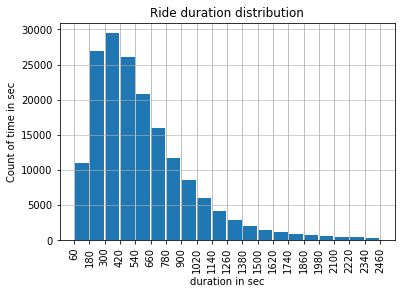

In [53]:
#create my base color constant
base_color = sb.color_palette()[0]
#limiting my reasult by bins
bins=np.arange(60,2500,120)

df.duration_sec.plot.hist(grid=True, bins=bins, rwidth=0.9,
                   color= base_color)


# Set plot title ,axes labels and rotate my x_tickets 
plt.title('Ride duration distribution');
plt.xlabel('duration in sec')
plt.ylabel('Count of time in sec')
plt.xticks(bins,bins,rotation=90);
plt.grid(axis='y', alpha=0.75)

- The distribution exhibit a long tail
- trips are most likely take 180:1000 sec , (3 To 17) by minutes 

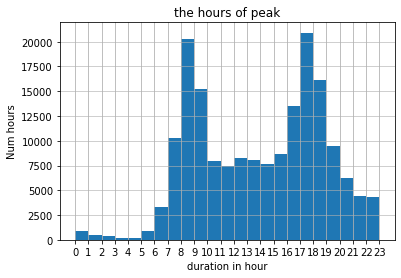

In [54]:
#limiting my reasult by the maxmum value of start time hour 
bins =np.arange(0,df['start_time_hour'].max()+1,1)

df.start_time_hour.hist(bins= bins);
plt.title('the hours of peak');
plt.ylabel('Num hours');
plt.xlabel('duration in hour');
plt.xticks(bins,bins,rotation = 0 );
plt.grid(axis='y', alpha=0.75)

the hours of peak betwean(8:00 ,9:00 AM) and (5:00 ,6:00 PM)

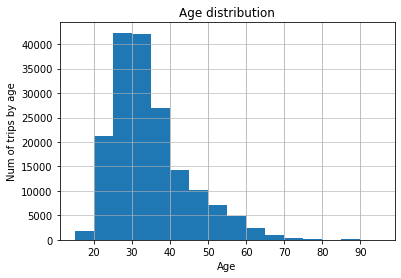

In [55]:
#limit the age by 90 years old 
bins=np.arange(15,100,5)
df.Age.hist(bins= bins);
# Set plot title and axes labels
plt.xlabel('Age')
plt.ylabel('Num of trips by age')
plt.title('Age distribution');
plt.grid(axis='y', alpha=0.75)

- Most riders is betwean (25,35) ,less betwean (35,45)&(25,20) ,
- few is The rest of the ages

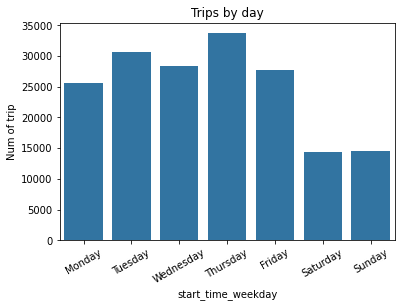

In [56]:
# Arrange x_axis by array of arranged weekdays  
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_count= sb.countplot(x= df.start_time_weekday ,color =base_color ,order= weekday );
plt.title('Trips by day');
plt.ylabel('Num of trip');
plt.xticks(rotation = 30 );

thurthday and tuesday have the maxmum cyclists during the week

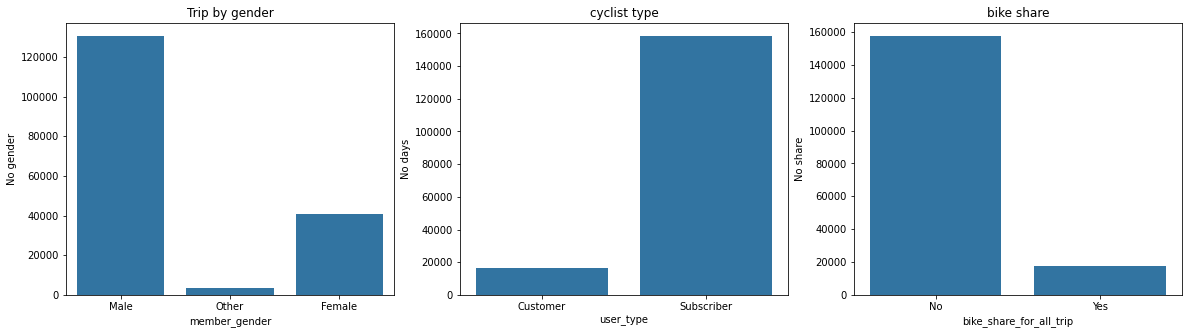

In [57]:
plt.figure(figsize=[20,5])
ax = plt.subplot(1,3,1);
sb.countplot(x= df.member_gender , color= base_color);
plt.title('Trip by gender');
plt.ylabel('No gender');

ax = plt.subplot(1,3,2);
sb.countplot(x= df.user_type , color = base_color );
plt.title('cyclist type');
plt.ylabel('No days');

ax = plt.subplot(1,3,3);
sb.countplot(x= df.bike_share_for_all_trip , color= base_color);
plt.title('bike share');
plt.ylabel('No share');

- males use our services more than females triple time
- Customers use our services less than subscriber eight times

### Discussion of the distribution(s) of your variable(s) of interest. Were there any unusual points
- I checked each variables like the duration of riding bike weekdays and peak hours ,age groups bike riders,genders wise rides   etc. 
>interestingly, the trip duration takes a large amount of values and is concentrated betwean (100- 600) seconds peak occurred starting from 0 and then distribution starts to dip and there is no more peak value.
> ,The number of trips peaked around 8-9am and 17-18pm during a day, there were more trips on work days (Mon-Fri) compared to weekends
> ,Most riders is betwean (25,35) , less betwean (35,45)&(25,20) , few is The rest of the other ages

###  features I investigated were I find unusual distributions

 - I calculate Birth year by substracting the year from current year so this gives us a distibution for also ,I generated new columns to calculate weekdays,days of month,hours
 > age gives a better better perception regarding trip duration dependence also split column date will help us in investigation about the duration of trip and its correlation 

## Bivariate Exploration

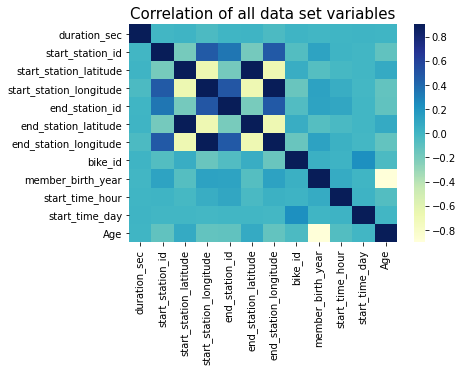

In [58]:
 sb.heatmap(df.corr(), vmin=-0.9, vmax=0.9,cmap="YlGnBu")
plt.title("Correlation of all data set variables", fontsize =15 );

The correlation cofficients indicate there might be correlations betwean start and end station , start staion latitude and longitude , end station longitude and latitude

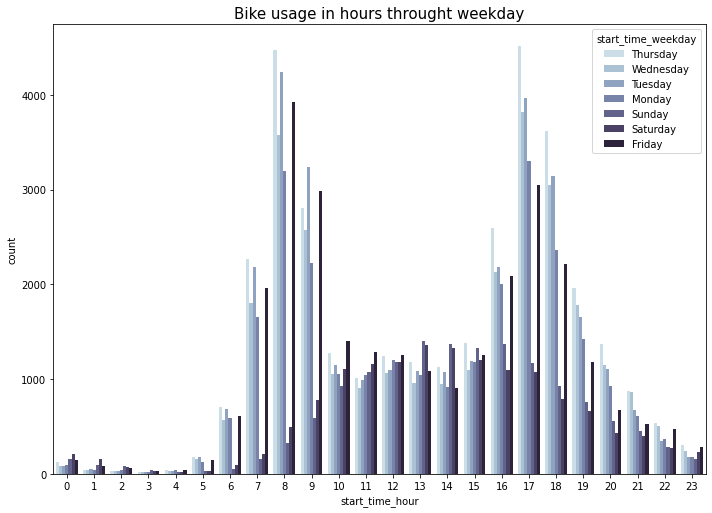

In [59]:
plt.figure(figsize=[ 11.69, 8.27])
#searching for the corelation betwean hours in x_axis and weekdays in y_axis  
sb.countplot(data = df, x = 'start_time_hour', hue = 'start_time_weekday', palette = 'ch:s=.25,rot=-.25');
plt.title('Bike usage in hours throught weekday',fontsize=15);

Tuesday (8:00 AM & 5:00 PM) has the highest biker counts across 7 days, 24 hours.

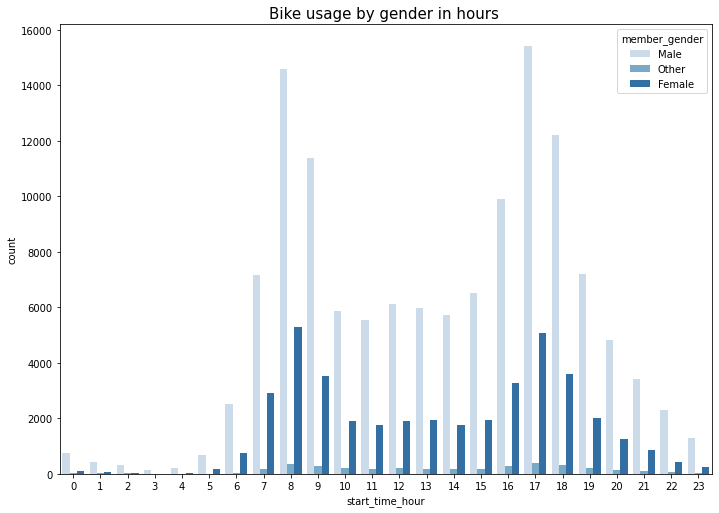

In [60]:
plt.figure(figsize=[ 11.69, 8.27])
#searching for the corelation betwean hours in x_axis and the count gender in y_axis
sb.countplot(data = df, x = 'start_time_hour', hue = 'member_gender', palette = "Blues");
plt.title('Bike usage by gender in hours ',fontsize =15);

(8:00 AM & 5:00 PM) have the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more female bikers compared to other hours.

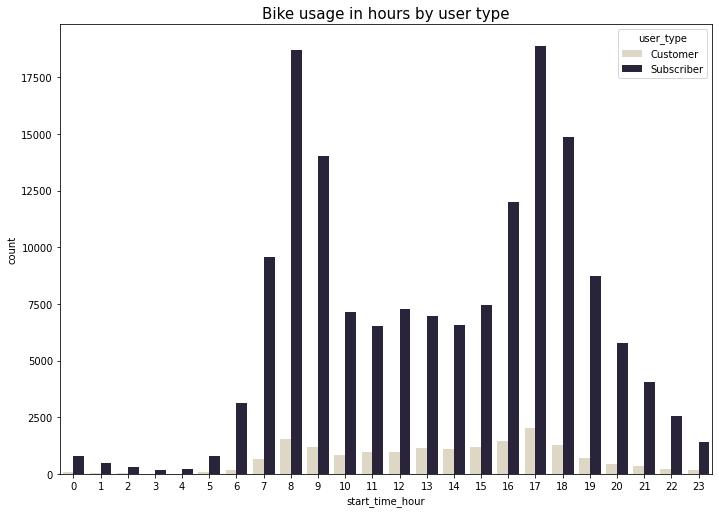

In [61]:
plt.figure(figsize=[ 11.69, 8.27])
#searching for the corelation betwean hours in x_axis and the count of user type in y_axis
sb.countplot(data = df, x = 'start_time_hour', hue = 'user_type', palette = 'ch:s=-.2,r=.6');
plt.title('Bike usage in hours by user type',fontsize = 15);

(8:00 AM & 5:00 PM) has the most subscriber . 8:00 AM and 5:00 PM have more customer bikers compared to other hours.

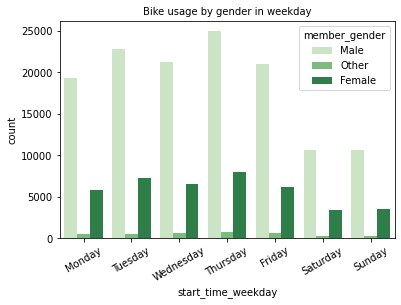

In [62]:
#searching for the corelation betwean weekdays in x_axis and the count of gender in y_axis  
sb.countplot(data = df, x = 'start_time_weekday', hue = 'member_gender', palette = 'Greens', order= weekday );
plt.xticks(rotation = 30);
plt.title('Bike usage by gender in weekday',fontsize=10);

Thursday and Tuesday have the most male bikers compared to other days. It also has the most female bikers compared to other days.

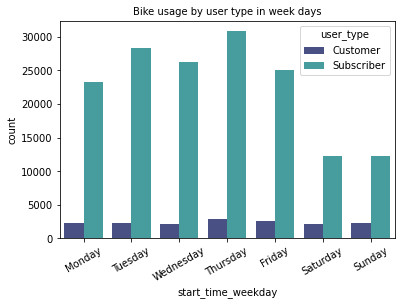

In [63]:
#searching for the corelation betwean weekdays in x_axis and the count of user type in y_axis
sb.countplot(data = df, x = 'start_time_weekday', hue = 'user_type', palette = 'mako' ,order= weekday);
plt.xticks(rotation = 30);
plt.title('Bike usage by user type in week days',fontsize = 10);

Thursday has the most 'Subscriber' bikers compared to other days. it also has the most 'Customer' bikers compared to other days.

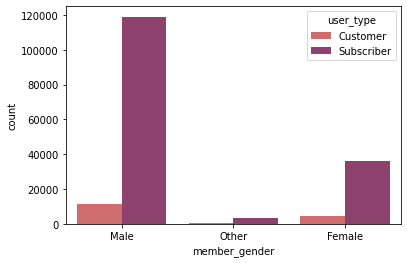

In [64]:
#searching for the corelation betwean the gender is x_axis and the count of user type in y_axis
sb.countplot(data = df, x = 'member_gender', hue = 'user_type', palette = 'flare');

Most 'Subscriber' are male. also Most 'Customer' bikers are also male

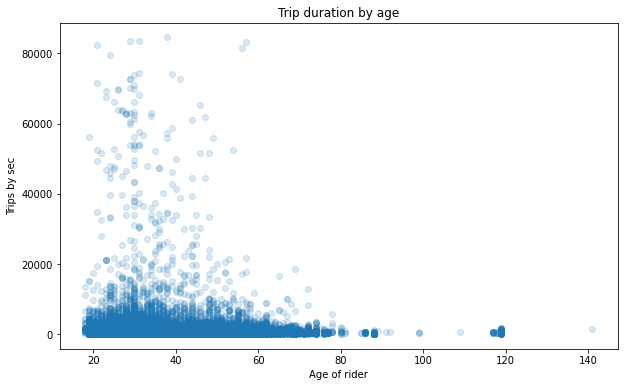

In [65]:
#plot space
fig, ax = plt.subplots(figsize=(10, 6))

# x and y axes
ax.scatter(x = df['Age'] , y = df['duration_sec'], alpha = 1/6)

# Set plot title and axes labels
ax.set(title = 'Trip duration by age',
       xlabel = 'Age of rider',
       ylabel = 'Trips by sec')

plt.show()

long trip duration is for youth betwean (20 & 45) that is natural other than old people

###  some of the relationships I observed in this part of the investigation 

- Tuesday (8:00 AM & 5:00 PM) has the highest biker counts across 7 days, 24 hours.
- (8:00 AM & 5:00 PM) have the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more female bikers compared to other hours.
- (8:00 AM & 5:00 PM) has the most subscriber . 8:00 AM and 5:00 PM have more customer bikers compared to other hours.
- Thursday and Tuesday have the most male bikers compared to other days. It also has the most female bikers compared to other days.
- Thursday has the most 'Subscriber' bikers compared to other days. it also has the most 'Customer' bikers compared to other days.
- Most 'Subscriber' are male. also Most 'Customer' bikers are also male

###  I observe  interesting relationships between the other features 

- I thought that variables which are user type , gender and age values having higher value to get higher trip duration
  i suggest to investigate more about the correlation betwean those variables 

## Multivariate Exploration

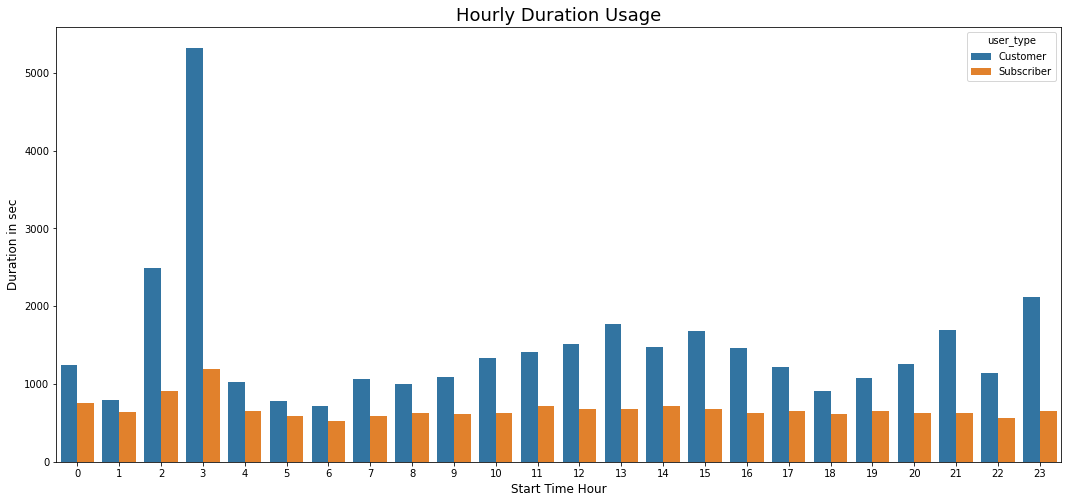

In [66]:
plt.figure(figsize=[18,8]);
sb.barplot(data=df, x='start_time_hour', y='duration_sec',ci=None ,hue='user_type');
# Set plot title and axes labels
plt.title("Hourly Duration Usage" ,fontsize=18);
plt.xlabel('Start Time Hour',fontsize=12);
plt.ylabel('Duration in sec' ,fontsize=12);

- Subscribers have stable duration usage than Customers who have unstable usage
- intensely Subscribers use our services at peak hour, incontrast the Customers have more flexible time.

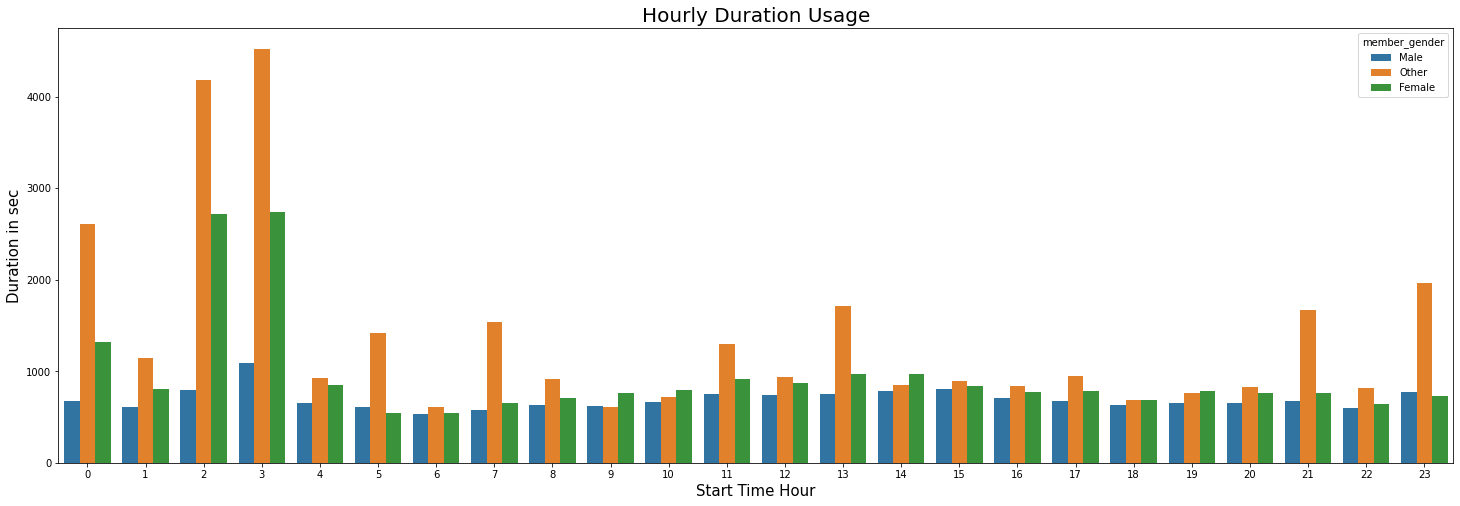

In [67]:
plt.figure(figsize=[25,8]);
sb.barplot(data=df, x='start_time_hour', y='duration_sec', ci=None, hue='member_gender' );
# Set plot title and axes labels
plt.title("Hourly Duration Usage" ,fontsize=20);
plt.xlabel('Start Time Hour',fontsize=15);
plt.ylabel('Duration in sec' ,fontsize=15);

- males have stable duration usage than female and others who have unstable usage
- average duration at 3.00 AM is most high by female and others

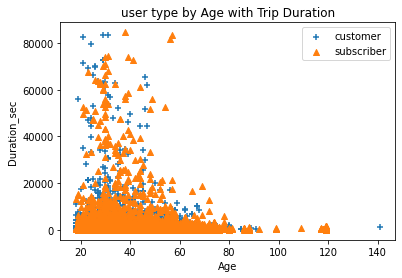

In [68]:
#giving both customer and subscriber marks
Marks = [['Customer', '+'],['Subscriber', '^']]
#looping for user type 
for user, marker in Marks:
    df_user = df[df['user_type'] == user]
    plt.scatter(df_user['Age'], df_user['duration_sec'], marker = marker, alpha= 1 )
plt.legend(['customer','subscriber'])
# Set plot title and axes labels
plt.title('user type by Age with Trip Duration')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

both Customer and Subscriber are showing similar trends for age and trip duration, but for subscribers the trip duration is higher for younger age.

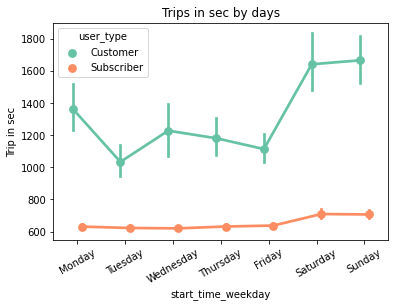

In [69]:
sb.pointplot(data=df, x='start_time_weekday', y='duration_sec', hue='user_type', dodge=0.2 ,order= weekday ,
            palette="Set2" );
#arrange x_axis by arranged weekdays
plt.ylabel('Trip in sec');
plt.xticks(rotation = 30);
plt.title('Trips in sec by days');

- subscriber and customer have increased trip duration on saturday and sunday 
- subscriber trips are more shorter and quicker compared to customer 
- more effictive usage for subscriber and consistent average duration   

###  some of the relationships I observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Subscribers have stable duration usage than Customers who have unstable usage
- intensely Subscribers use our services at peak hour, incontrast the Customers have more flexible time
- males have stable duration usage than female and others who have unstable usage
- subscriber and customer have increased trip duration on saturday and sunday
- subscriber trips are more shorter and quicker compared to customer
- more effictive usage for subscriber and consistent average duration

### Were there any interesting or surprising interactions between features?

- average duration at 3.00 AM is most high by female and others 
> It's kind of surprise that average duration at 3.00 AM is most high than in other hour suggest there were group trip or there were event 

In [ ]:
!jupyter nbconvert communicate_data_finding_slide.ipynb --to slides --post serve --no-input --no-prompt